In [1]:
%load_ext autoreload
%autoreload 2

from bosonicplus.states.nongauss import prepare_gkp_nonlinear_sqz
from bosonicplus.plotting import plot_wigner_marginals, plot_wig
from bosonicplus.effective_sqz import effective_sqz, get_gkp_stabilizer
from bosonicplus.gkp_squeezing import gkp_nonlinear_squeezing_operator, Q_expval, get_gkp_squeezing_displacements
from bosonicplus.operations.symplectic import rotation
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from bosonicplus.conversions import to_dB, Delta_to_dB
import seaborn as sns

hbar = 2
colwidth = 3.41667

fs = 10

mpl.rcParams.update({'font.size': fs, 
                     "text.usetex":  True, 
                     'font.family':'serif',
                     'xtick.labelsize': 8, 
                     'ytick.labelsize':8 })


kwargs = {'grid': 'square', 
          'fontsize' : fs, 
          'title': None, 
          'figsize' :(colwidth,colwidth), 
          'linewidth':1,
          'xlim': 4,
          'plim': 4}

fig_kwargs = {'dpi':800, 'bbox_inches': 'tight'}

In [2]:
def print_test(n, lattice):
    
    print('GKP: ', lattice)
    
    gkp = prepare_gkp_nonlinear_sqz(n, lattice, fast=True)
    gkp.normalise()

    
    if lattice == '0' or lattice == '1':
        scalex =  np.sqrt(hbar*np.pi)
        scalep =  np.sqrt(hbar*np.pi)
        grid = 'rect'
        xlim = 4
        plim = 4
        
        
        Dx = effective_sqz(gkp, 'rx')
        Dp = effective_sqz(gkp, 'rp')

        b1 = get_gkp_stabilizer('rx')
        b2 = get_gkp_stabilizer('rp')

        
        
        print('Eff sqz rx: ', Dx)
        print('Eff sqz rp: ', Dp)
        print('Eff sqz rx: ', Delta_to_dB(Dx),' dB')
        print('Eff sqz rp: ', Delta_to_dB(Dp),' dB')
       
        
        
    elif lattice == 's0' or lattice == 's1':
        grid = 'square'
        scalex = np.sqrt(2*hbar*np.pi)
        scalep = np.sqrt(2*hbar*np.pi)
        xlim = 3
        plim = 3
        Dx = effective_sqz(gkp, 'sx')
        Dp = effective_sqz(gkp, 'sp')
        print('Eff sqz sx: ',Dx)
        print('Eff sqz sp: ', Dp)
        print('Eff sqz sx: ', Delta_to_dB(Dx),' dB')
        print('Eff sqz sp: ', Delta_to_dB(Dp),' dB')
        b1 = get_gkp_stabilizer('sx')
        b2 = get_gkp_stabilizer('sp')

       
        
    elif lattice == 'h0' or lattice == 'h1': 
        grid = 'hex'
        scalex = (3/4)**(1/4) * np.sqrt(hbar*np.pi)
        scalep = (4/3)**(1/4) * np.sqrt(hbar*np.pi)
        scale = 1
        xlim = 4
        plim = 4
        
        Dx = effective_sqz(gkp, 'hx')
        Dp = effective_sqz(gkp, 'hp')
        print('Eff sqz hx: ',Dx)
        print('Eff sqz hp: ', Dp)
        print('Eff sqz hx: ', Delta_to_dB(Dx),' dB')
        print('Eff sqz hp: ', Delta_to_dB(Dp),' dB')
        b1 = get_gkp_stabilizer('hx')* np.exp(-1j*np.pi/12)
        b2 = get_gkp_stabilizer('hp')* np.exp(-1j*np.pi/12)

        
        
    elif lattice == 'hs0' or lattice == 'hs1': 
        grid = 'hex_square'
        scalex = (3/4)**(1/4) * np.sqrt(2*hbar*np.pi)
        scalep = (4/3)**(1/4) * np.sqrt(2*hbar*np.pi)
        scale =1
        xlim = 3
        plim = 3
        Dx = effective_sqz(gkp, 'hsx')
        Dp = effective_sqz(gkp, 'hsp')
        print('Eff sqz hsx: ',Dx)
        print('Eff sqz hsp: ', Dp)
        print('Eff sqz hsx: ', Delta_to_dB(Dx), ' dB')
        print('Eff sqz hsp: ', Delta_to_dB(Dp), ' dB')
        b1 = get_gkp_stabilizer('hsx') * np.exp(-1j*np.pi/12)
        b2 = get_gkp_stabilizer('hsp') * np.exp(-1j*np.pi/12)
        

    print('average effective squeezing', (Dx + Dp)/2)
    print('average effective squeezing', Delta_to_dB((Dx + Dp)/2), ' dB')
        
    b1 *= np.sqrt(2*hbar)
    b2 *= np.sqrt(2*hbar)

    print('Q_expval: ', Q_expval(gkp,lattice))
    rho = gkp_nonlinear_squeezing_operator(n,lattice= lattice)
    w, v = np.linalg.eigh(rho)
    coeffs = v[:,0] 
    print('First eigenval of Q op (Fock): ', w[0])

    if lattice in ['h0','h1', 'hs0', 'hs1'] :
        gkp.apply_symplectic(rotation(-np.pi/12))


    x = np.linspace(-12,12,300)
    W = gkp.get_wigner_bosonic(x,-x).real
    #W = gkp.get_wigner_log(x,-x).real
    kwargs['grid'] = grid
    kwargs['xlim'] = xlim
    kwargs['plim'] = plim
    
    fig, ax, axx, axp, axc = plot_wigner_marginals(W,x,x, **kwargs)

    arrow_kwargs = {'length_includes_head':True, 'head_width' : 0.2, 'head_length' : 0.2}
    ax.arrow(0,0, b1.real/scalex, b1.imag/scalep, color = 'blue', **arrow_kwargs)
    ax.arrow(0,0, b2.real/scalex, b2.imag/scalep, color = 'red', **arrow_kwargs)
    
    
    
    return fig, ax, axx, axp, axc 
      
    

GKP:  0
Eff sqz rx:  0.45200327715971556
Eff sqz rp:  0.33734788529541015
Eff sqz rx:  6.897168328231594  dB
Eff sqz rp:  9.438440158515975  dB
average effective squeezing 0.39467558122756285
average effective squeezing 8.07519485573215  dB
Q_expval:  (0.4554233981522339+8.937373275263658e-15j)
First eigenval of Q op (Fock):  0.4553683103765043


/Users/s163967/Library/CloudStorage/OneDrive-DanmarksTekniskeUniversitet/Git_Repos/bosonicplus/src/bosonicplus/states/coherent.py:128: RuntimeWarning: divide by zero encountered in log
  bn = np.log(np.sqrt(factorial(ns)) / eps** ns * coeffs[:,np.newaxis])


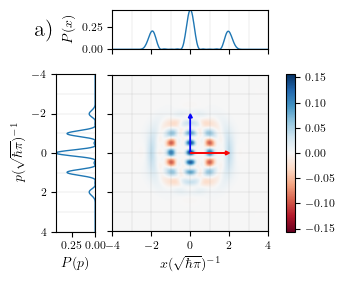

GKP:  1
Eff sqz rx:  0.44861208236779593
Eff sqz rp:  0.46081994945726507
Eff sqz rx:  6.962580676808717  dB
Eff sqz rp:  6.729374560808509  dB
average effective squeezing 0.4547160159125305
average effective squeezing 6.845194977919455  dB
Q_expval:  (0.6421433609503111-2.9652929417478546e-17j)
First eigenval of Q op (Fock):  0.6421328353307195


/Users/s163967/Library/CloudStorage/OneDrive-DanmarksTekniskeUniversitet/Git_Repos/bosonicplus/src/bosonicplus/states/coherent.py:128: RuntimeWarning: divide by zero encountered in log
  bn = np.log(np.sqrt(factorial(ns)) / eps** ns * coeffs[:,np.newaxis])


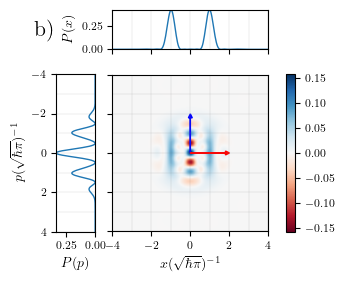

GKP:  s0
Eff sqz sx:  0.38899620073005514
Eff sqz sp:  0.38899927913020704
Eff sqz sx:  8.201092806906408  dB
Eff sqz sp:  8.20102406963306  dB
average effective squeezing 0.3889977399301311
average effective squeezing 8.20105843820174  dB
Q_expval:  (0.4231115237344151+5.092540972251314e-14j)
First eigenval of Q op (Fock):  0.42307878304547497


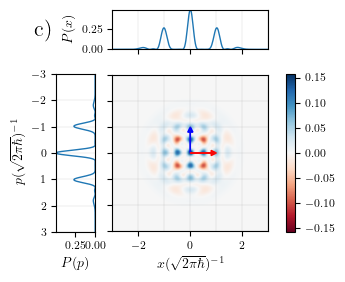

GKP:  s1
Eff sqz sx:  0.4680503071610281
Eff sqz sp:  0.39401082713116853
Eff sqz sx:  6.594149308250488  dB
Eff sqz sp:  8.089836878274571  dB
average effective squeezing 0.43103056714609833
average effective squeezing 7.3098386027178925  dB
Q_expval:  (0.5075569942463325+3.5605199344423966e-16j)
First eigenval of Q op (Fock):  0.5075174606515921


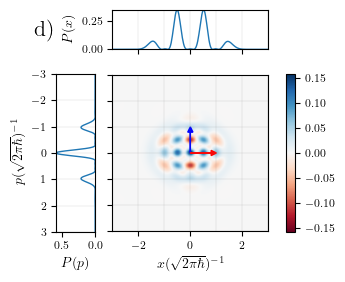

GKP:  h0
Eff sqz hx:  0.3452338619907365
Eff sqz hp:  0.4152249734320073
Eff sqz hx:  9.23773226872621  dB
Eff sqz hp:  7.634330680381231  dB
average effective squeezing 0.3802294177113719
average effective squeezing 8.399085710722433  dB
Q_expval:  (0.5141797078752459+4.176216664153465e-14j)
First eigenval of Q op (Fock):  0.5141304882178626


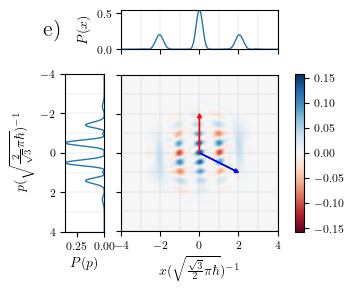

GKP:  h1
Eff sqz hx:  0.39255624427662017
Eff sqz hp:  0.46178757095345113
Eff sqz hx:  8.121962201100288  dB
Eff sqz hp:  6.71115520659135  dB
average effective squeezing 0.42717190761503565
average effective squeezing 7.387946316637524  dB
Q_expval:  (0.6214477510194318+2.687059559233762e-15j)
First eigenval of Q op (Fock):  0.6214374871911235


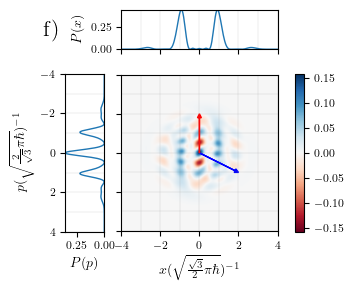

GKP:  hs0
Eff sqz hsx:  0.40097763513224177
Eff sqz hsp:  0.4009768231410059
Eff sqz hsx:  7.937596996949199  dB
Eff sqz hsp:  7.937614586143171  dB
average effective squeezing 0.4009772291366238
average effective squeezing 7.937605791541734  dB
Q_expval:  (0.5059079843262172+1.8595368300733384e-14j)
First eigenval of Q op (Fock):  0.5058809420312222


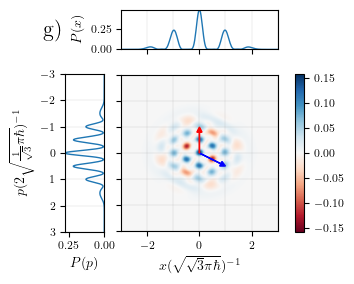

GKP:  hs1
Eff sqz hsx:  0.3870556921206437
Eff sqz hsp:  0.3694241408301223
Eff sqz hsx:  8.244530826726631  dB
Eff sqz hsp:  8.64949456087463  dB
average effective squeezing 0.378239916475383
average effective squeezing 8.444652820753635  dB
Q_expval:  (0.45722129233371533+7.412473412848897e-15j)
First eigenval of Q op (Fock):  0.45718603354026055


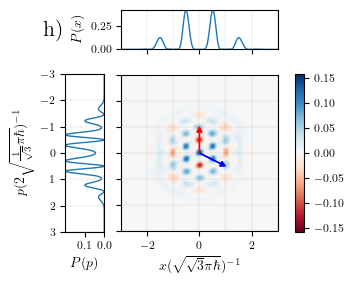

In [3]:
n = 12
lattices = ['0', '1', 's0', 's1', 'h0', 'h1', 'hs0', 'hs1']
labels = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)']
for i, lattice in enumerate(lattices):
    
    fig, ax, axx, axp, axc = print_test(n, lattice)
    axx.text(-0.5, 1.25, labels[i], fontsize = 16, transform=ax.transAxes)
    #plt.savefig(f'../figspaper/gkp_squeezing/W_{lattice}_{n}_photons.pdf',**fig_kwargs)
    plt.show()

In [4]:
def plot_gkp_squeezing(ax, nmax, lattice, c, dB = True):
    eigs = np.zeros(nmax+1)
    
    for n in range(nmax+1):
        rho = gkp_nonlinear_squeezing_operator(n,lattice= lattice)
        w, v = np.linalg.eigh(rho)
        eigs[n] = w[0]
        
        

    if dB:
        ax.plot(range(nmax+1), to_dB(eigs),c=c, label =rf'$\xi_{{{lattice}}}$')
        
    else:
        ax.plot(range(nmax+1), eigs, c=c,label = lattice)
       
        
    #plt.ylabel(r'Smallest eigenvalue of $\hat{Q}$ [dB]')
    ax.set_xlabel(r'Photon number, $n$')
    ax.grid('on')
    ax.legend()
    ax.set_ylabel('Squeezing [dB]')
    ax.set_xlim([0,nmax])
    

In [5]:
def plot_effective_squeezing(ax, nmax, lattice, c, dB=True):
    dx = np.zeros(nmax+1)
    dp = np.zeros(nmax+1)
    
    for n in range(nmax+1):
        gkp = prepare_gkp_nonlinear_sqz(n, lattice, fast=True)
    
        if lattice in ['0', '1']:
            dx[n] = effective_sqz(gkp, 'rx')
            dp[n] = effective_sqz(gkp, 'rp')
        elif lattice in ['s0', 's1']:
            dx[n] = effective_sqz(gkp, 'sx')
            dp[n] = effective_sqz(gkp, 'sp')
        elif lattice in ['h0', 'h1']:
            dx[n] = effective_sqz(gkp, 'hx')
            dp[n] = effective_sqz(gkp, 'hp')
        elif lattice in ['hs0', 'hs1']:
            dx[n] = effective_sqz(gkp, 'hsx')
            dp[n] = effective_sqz(gkp, 'hsp')
            
    if dB:
        ax.plot(range(nmax+1), Delta_to_dB((dx+dp)/2), linestyle='--', c= c)
        #plt.plot(range(nmax+1), Delta_to_dB(dp), marker = 's', label = r'$\Delta_p$')
        
    #plt.ylabel(r'Symmetric effective squeezing [dB]')
    #plt.xlabel(r'Photon number, $n$')
    

<function matplotlib.pyplot.show(close=None, block=None)>

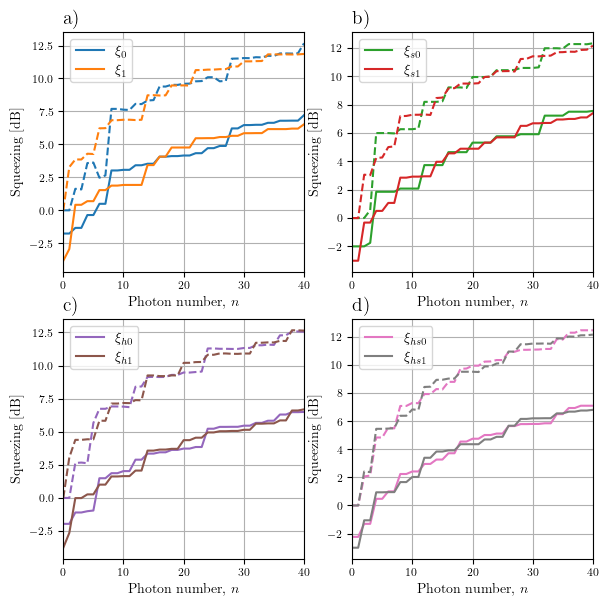

In [6]:
c = sns.color_palette('tab10',)
#c = cmap(np.linspace(0, 1, 8))

nmax = 40

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(2*colwidth,2*colwidth))

lattices = ['0', '1']


for i, lattice in enumerate(lattices):
    plot_gkp_squeezing(ax1,nmax, lattice, c[i])
    plot_effective_squeezing(ax1, nmax, lattice,c[i])

lattices = ['s0', 's1']

for i, lattice in enumerate(lattices):
    plot_gkp_squeezing(ax2,nmax, lattice, c[i+2])
    plot_effective_squeezing(ax2, nmax, lattice,c[i+2])

lattices = ['h0', 'h1']

for i, lattice in enumerate(lattices):
    plot_gkp_squeezing(ax3,nmax, lattice, c[i+4])
    plot_effective_squeezing(ax3, nmax, lattice,c[i+4])

lattices = ['hs0', 'hs1']

for i, lattice in enumerate(lattices):
    plot_gkp_squeezing(ax4,nmax, lattice, c[i+6])
    plot_effective_squeezing(ax4, nmax, lattice,c[i+6])



ax1.set_title('a)', loc = 'left', fontsize = 14)
ax2.set_title('b)', loc = 'left', fontsize = 14)
ax3.set_title('c)', loc = 'left', fontsize = 14)
ax4.set_title('d)', loc = 'left', fontsize = 14)
#plt.savefig(f'../figspaper/gkp_squeezing/gkp_squeezing.pdf',**fig_kwargs)
plt.show